In [3]:
import numpy as np
import matplotlib.pyplot as plt

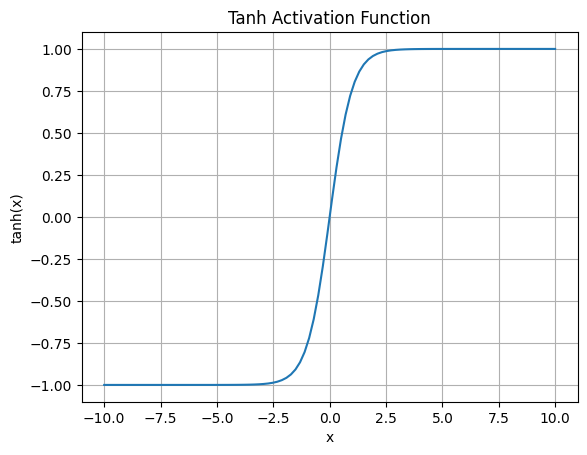

In [4]:
x = np.linspace(-10, 10, 100)
y = np.tanh(x)

# Plotting
plt.plot(x, y)
plt.title("Tanh Activation Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.show()

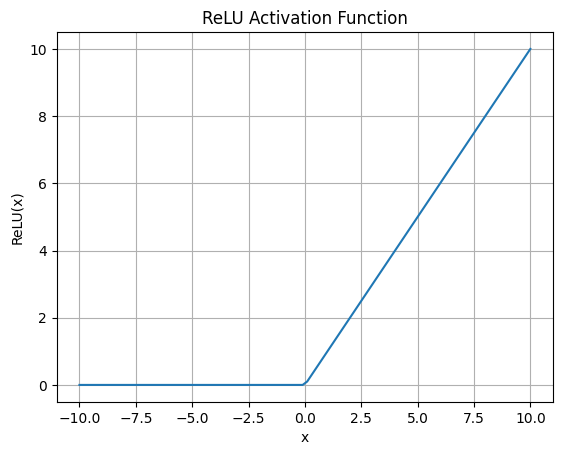

In [5]:
y_relu = np.maximum(0, x)

# Plotting
plt.plot(x, y_relu)
plt.title("ReLU Activation Function")
plt.xlabel("x")
plt.ylabel("ReLU(x)")
plt.grid(True)
plt.show()

In [7]:
import pandas as pd

# Define the DataFrame
data = {'Age': [16, 19, 18, 20, 19, 21], 'Fee': [12, 11, 11, 13, 14, 15], 'School': ['Purdue', 'Purdue', 'Indiana', 'Indiana', 'Notre Dame', 'Notre Dame']}
df = pd.DataFrame(data)

# 1. Rows where Age > 18
AgeLargerThan18 = df[df['Age'] > 18]

# 2. Remove duplicated schools
Schools = df['School'].drop_duplicates()

# 3. Add calculated column "FourYearFee"
df['FourYearFee'] = df['Fee'] * 4

# 4. Sort df by Age in ascending order
df_sorted = df.sort_values(by='Age')

# 5. Standard deviation of the Fee
fee_std = df['Fee'].std()


Output of filter f1:
      0     1
0  34.0  33.0
1  37.0  34.0

Output of filter f2:
    0   1
0   2  21
1 -37  20

Output of filter f3 (on padded image):
   0  1  2  3  4
0  4  3 -5  3 -5
1  6  5 -3 -2 -6
2  5 -1  8 -9 -3
3  6  1  5 -8 -4
4  3  4 -1 -4 -2


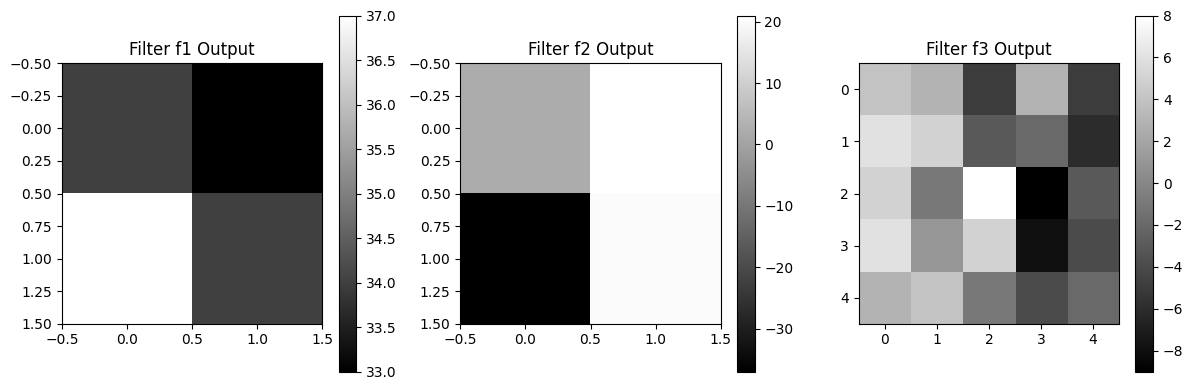

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the image and filters
img = np.array([[4, 7, 2, 5],
                [2, 4, 6, 1],
                [3, 0, 6, 2],
                [3, 7, 6, 2]])

f1 = np.ones((3, 3))
f2 = np.array([[-1, -1, -1],
               [-1, 8, -1],
               [-1, -1, -1]])
f3 = np.array([[1, -1],
               [1, -1]])

# Convolve the image with the filters
from scipy.signal import convolve2d
output_f1 = convolve2d(img, f1, mode='valid')
output_f2 = convolve2d(img, f2, mode='valid')

# Augment the image with a white margin for filter f3
newimg = np.pad(img, pad_width=1, mode='constant', constant_values=0)
output_f3 = convolve2d(newimg, f3, mode='valid')

# Convert results to pandas DataFrames for easier visualization
output_f1_df = pd.DataFrame(output_f1)
output_f2_df = pd.DataFrame(output_f2)
output_f3_df = pd.DataFrame(output_f3)

# Display the DataFrames
print("Output of filter f1:")
print(output_f1_df)

print("\nOutput of filter f2:")
print(output_f2_df)

print("\nOutput of filter f3 (on padded image):")
print(output_f3_df)

# Plot the convolution results
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(output_f1, cmap='gray')
plt.title('Filter f1 Output')
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(output_f2, cmap='gray')
plt.title('Filter f2 Output')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(output_f3, cmap='gray')
plt.title('Filter f3 Output')
plt.colorbar()

plt.tight_layout()
plt.show()



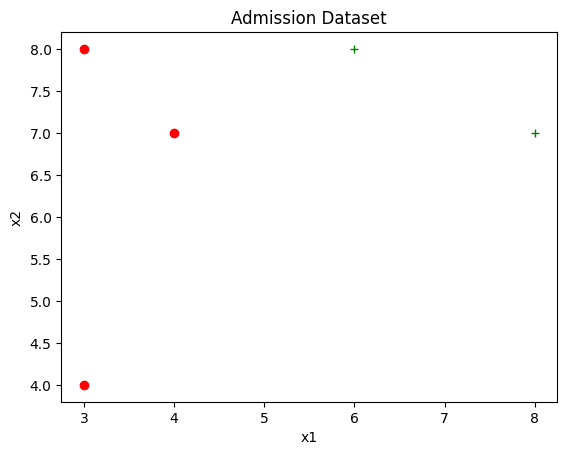

[-1, -1, -1, 1, 1]
Mean Squared Error: 0.0


In [10]:
import matplotlib.pyplot as plt

# Dataset
x1 = [3, 3, 4, 6, 8]
x2 = [8, 4, 7, 8, 7]
y = [-1, -1, -1, 1, 1]

# Plot the dataset
for i in range(len(y)):
    if y[i] == 1:
        plt.plot(x1[i], x2[i], 'g+')
    else:
        plt.plot(x1[i], x2[i], 'ro')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Admission Dataset")
plt.show()

# Logistic Regression predictions
w = [1, 0.3]
b = -7

# Compute ypred
ypred = [1 if (w[0]*x1[i] + w[1]*x2[i] + b) >= 0 else -1 for i in range(len(x1))]
print(ypred)

# Mean squared error
mse = sum([(y[i] - ypred[i])**2 for i in range(len(y))]) / len(y)
print("Mean Squared Error:", mse)


In [11]:
import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initial weights and the data point
w_old = np.array([-1, 1])
x_i = np.array([3, 8])
y_i = -1

# Step 1: Compute the prediction z = w^T * x_n
z = np.dot(w_old, x_i)

# Step 2: Apply the sigmoid function to -y_n * z
update_term = sigmoid(np.dot(-y_i, z))

# Step 3: Calculate the update term, multiplying the sigmoid output by y_n * x_n
gradient_corrected = np.dot(update_term, np.dot(y_i, x_i))

# Step 4: Update the weights
w_new_corrected = w_old + gradient_corrected

print("Updated weights after one step of SGD:", w_new_corrected)


Updated weights after one step of SGD: [-3.97992145 -6.94645719]
